# Day 05: Image Processing

## Creating an Image

In [1]:
from PIL import Image

In [10]:
# Create 100x100 image with white background

image = Image.new('RGBA', (100, 100))

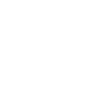

In [11]:
display(image)

In [12]:
# Create 320x240 image with blue background

image = Image.new('RGBA', (320, 240), 'blue')

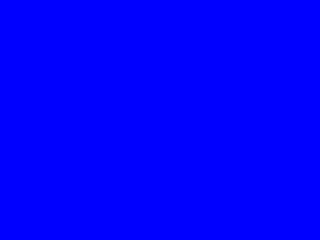

In [14]:
# Display image in Jupyter Notebook

display(image)

In [15]:
# Get image dimensions

image.size 

(320, 240)

## Processing Images

To process an image pixel-by-pixel, we can use the following recipe:

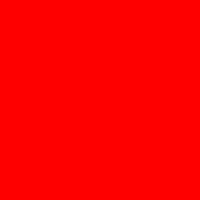

In [19]:
color         = (255, 0, 0)
image         = Image.new('RGBA', (200, 200))
width, height = image.size

# Replace all pixels with color
for x in range(width):
    for y in range(height):
        image.putpixel((x, y), color)
        
display(image)

### Exercise: Random Colors

Create an image with random colors

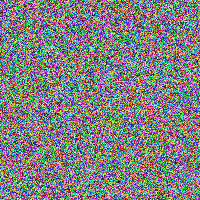

In [23]:
import random

image         = Image.new('RGBA', (200, 200))
width, height = image.size

for x in range(width):
    for y in range(height):
        # Generate random color by assignment RGB components to
        # random values
        r     = random.randint(0, 255)
        g     = random.randint(0, 255)
        b     = random.randint(0, 255)
        color = (r, g, b)
        image.putpixel((x, y), color)

display(image)

### Exercise: Tricolor Flag

Create an image that is a tricolor flag:

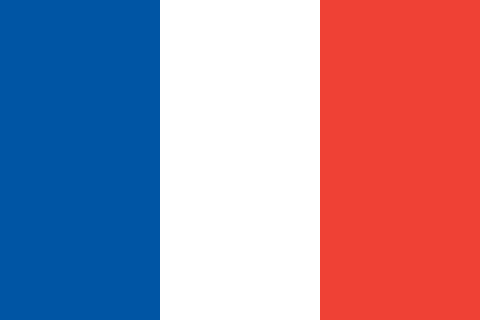

In [25]:
BLUE  = (  0,  85, 164)
WHITE = (255, 255, 255)
RED   = (239,  65,  53)

image         = Image.new('RGBA', (480, 320))
width, height = image.size

for x in range(width):
    for y in range(height):
        if x < width/3:
            image.putpixel((x, y), BLUE)
        elif x < 2*width/3:
            image.putpixel((x, y), WHITE)
        else:
            image.putpixel((x, y), RED)

display(image)

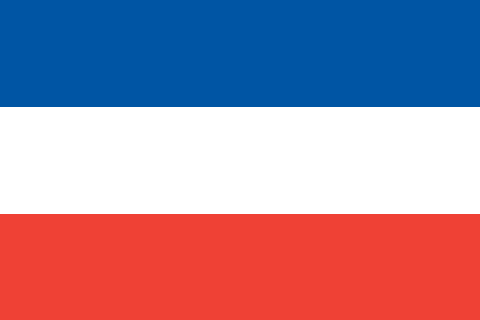

In [27]:
# Horizontal

image         = Image.new('RGBA', (480, 320))
width, height = image.size

for x in range(width):
    for y in range(height):
        if y < height/3:
            image.putpixel((x, y), BLUE)
        elif y < 2*height/3:
            image.putpixel((x, y), WHITE)
        else:
            image.putpixel((x, y), RED)

display(image)

## Reading and Writing Images

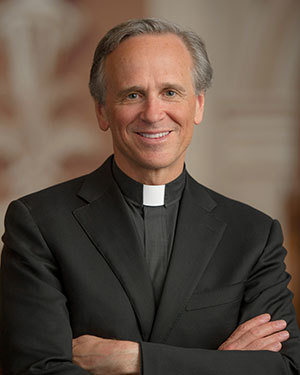

In [32]:
# Download image file and load into raster

import io
import requests

data  = requests.get('https://news.nd.edu/assets/154968/300x/john_jenkins_web.jpg')
image = Image.open(io.BytesIO(data.content))

display(image)

In [34]:
image.save('jenkings.jpg') # Write image to file

In [36]:
!ls

'Day 01.ipynb'	'Day 04.ipynb'	     Most-Recent-Cohorts-Scorecard-Elements.csv
'Day 02.ipynb'	'Day 05.ipynb'	     jenkings.jpg
'Day 03.ipynb'	'Lecture 01.ipynb'


### Exercise: Invert Colors

Invert the colors of an image from the Internet:

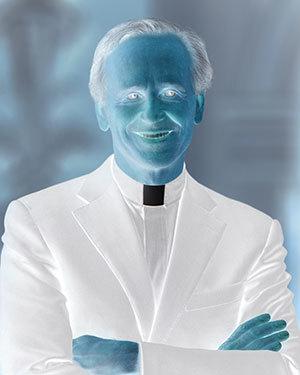

In [38]:
image         = Image.open('jenkings.jpg')
width, height = image.size

for x in range(width):
    for y in range(height):
        r, g, b = image.getpixel((x, y))
        new_r   = 255 - r
        new_g   = 255 - g
        new_b   = 255 - b
        color   = (new_r, new_g, new_b)
        image.putpixel((x, y), color)
        
display(image)

### Exercise: Random Artifacts

Add random artifacts to an image:

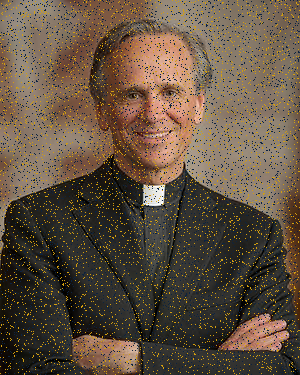

In [45]:
BLUE = ( 12,  35, 64)
GOLD = (211, 159, 16)

image         = Image.open('jenkings.jpg')
width, height = image.size

for x in range(width):
    for y in range(height):
        if not random.randint(0, 8):
            image.putpixel((x, y), random.choice((BLUE, GOLD)))
        
display(image)

### Exercise: Blend Images

Blend two images together:

1. Query the width and height of one of the images.

2. Create a new Image with the queried width and height.

3. Iterate through all the pixels in the new Image.

4. For each pixel, determine the pixel color value using the following formula:

    new_pixel = pixel1*weight + pixel2*(1 - weight)

5. Store the computed color for each pixel.

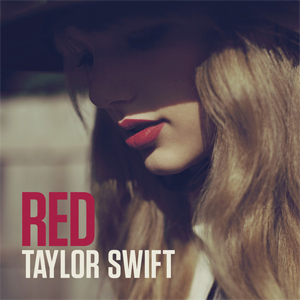

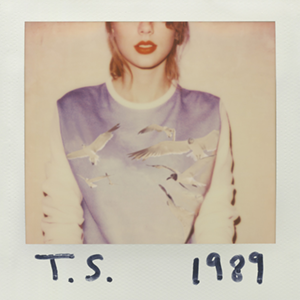

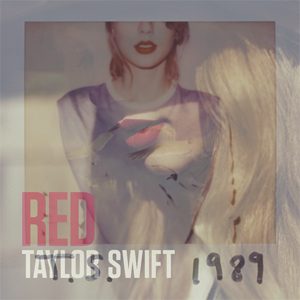

In [52]:
url1    = 'https://upload.wikimedia.org/wikipedia/en/e/e8/Taylor_Swift_-_Red.png'
url2    = 'https://upload.wikimedia.org/wikipedia/en/f/f6/Taylor_Swift_-_1989.png'
image1  = Image.open(io.BytesIO(requests.get(url1).content))
image2  = Image.open(io.BytesIO(requests.get(url2).content))
weight  = 0.5

display(image1)
display(image2)

blended       = Image.new('RGBA', image1.size)
width, height = blended.size

for x in range(width):
    for y in range(height):
        r1, g1, b1 = image1.getpixel((x, y)) 
        r2, g2, b2 = image2.getpixel((x, y))
        blended_r  = int(r1*weight + r2*(1.0 - weight))
        blended_g  = int(g1*weight + g2*(1.0 - weight))
        blended_b  = int(b1*weight + b2*(1.0 - weight))
        color      = (blended_r, blended_g, blended_b)
        blended.putpixel((x, y), color)
        
display(blended)